Licence CC BY-NC-ND, Valérie Roy & Thierry Parmentelat

In [ ]:
from IPython.display import HTML
HTML(url="https://raw.githubusercontent.com/ue12-p22/python-numerique/main/notebooks/_static/style.html")

# vectorisation

## contenu de ce notebook (sauter si déjà acquis)

la **vectorisation** (c'est-à-dire appliquer une fonction `numpy` à tout un tableau sans passer par un `for-python`)

<br>

les `ufunc`

<br>

`numpy.vectorize`

<br>

In [ ]:
# on importe la librairie numpy
import numpy as np
from matplotlib import pyplot as plt

## qu'est-ce que la vectorisation ?
<br>
  
        
**l'idée**  
pour appliquer une fonction à tous les éléments d'un tableau `numpy`

* de ne **jamais** utiliser une boucle `for-python`  
(qui calcule une indirection à chaque accès à un élément)
<br>    
    
* mais d'appliquer la fonction directement au tableau  
de manière *vectorisée*  
(`numpy` utilise alors un **décalage** pour passer d'un élément du tableau à un autre)
<br>

* c'est plus concis, vos codes sont plus rapides et plus lisibles !
   
<br>
    
**OUI**
```python
n = 10000000
x = np.linspace(0, 2*np.pi, n)

y = np.sin(x) # np.sin appliquée au tableau x
```   
    
 
<br>    
<br>
    
**NON**
```python
n = 10000000
x = np.linspace(0, 2*np.pi, n)
    
y = []
for e in x:   # NON MAL FAUX
    y.append(np.sin(e))
```
<br>
    
la vectotrisation est **la seule manière** d'écrire du code en `numpy`  
pour avoir des **temps d'exécution acceptables**
    
<br>
    
**conclusion**   
sur des tableaux `numpy` utilisez **toujours** la **vectorisation**  
**vectorisation** = le `for` est fait dans `numpy`

    
<br>
    
vérifiez en comparant les temps d'exécution des deux codes `%%timeit`  
attention c'est très long...

In [ ]:
%%timeit
n = 1000000
x = np.linspace(0, 2*np.pi, n)
y = np.sin(x) # np.sin appliquée au tableau x

In [ ]:
%%timeit
n = 1000000
x = np.linspace(0, 2*np.pi, n)

y = []
for e in x:
    y.append(np.sin(e))

### dessiner un cercle de rayon `r`

**exercice**

Dessinez un cercle de rayon `r`  

indices

1. $x = r\, sin(\theta)$  
   $y = r\, cos(\theta)$  
   avec $\theta$ variant de $0$ à $2\pi$
1. si votre cercle apparaît elliptique, c'est que les échelles de vos axes diffèrent   
   demandez à ce qu'elles soient égales avec `plt.axis('equal')`

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def cercle(r) :
    theta = np.linspace(0,2*np.pi,1000)
    plt.plot(r*np.cos(theta),r*np.sin(theta))
    plt.axis('equal')
    plt.show
    

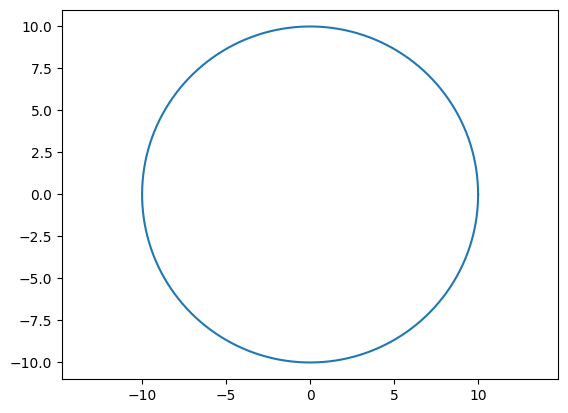

In [9]:
cercle(10)

### calculer une fonction polynomiale

**exercice**

1. faites une fonction qui retourne le calcul d'un polynome  
   par exemple $x^3 + 2x^2 -5x +1$  
   (puissance: `**` ou `numpy.power`)
<br>

2. appliquez la à un `np.ndarray`
<br>

3. que se passe-t-il ? (1)
<br>

4. affichez la fonction
<br>

(1) tout se passe très bien

In [15]:
# votre code ici
def scalar_function(x):
    return x**3 + 2*x**2 - 5*x + 1

In [17]:
scalar_function(np.array([[1,2,3],[1,2,3]]))

array([[-1,  7, 31],
       [-1,  7, 31]])

array([[1, 2, 3],
       [1, 2, 3]])

## les `ufunc`

## qu'est-ce qu'une `ufunc`

<br>

Le mécanisme général qui applique une fonction à un tableau  
est connu sous le terme de *Universal function*  
ou `ufunc`
    
<br>
    
(ce terme `ufunc` est utile pour des recherches sur Internet)
    
<br>

En conclusion, vous **devez** toujours utiliser les `ufunc` et plus jamais les `for-python`
    
* même si ça vous paraît plus difficile
* même si vous utilisiez des `for-python` en prépa
* par souci de la **performance en temps**, vous ne pouvez plus y échapper
    
    
    
* c'est juste une autre manière de penser le code  
* vos codes seront compacts et lisibles (élégants)

***

### quelles sont les fonctions vectorisées ?

<br>
    
**les opérateurs arithmétiques classiques**  
et leur contre-partie `numpy` (*Ufuncs*)


| opérateur | `numpy` fonction    |
|----------|-------------------|
|   `+`    | `np.add` |
|   `-`    | `np.substract`|
|   `*`    | `np.multiply` |
|   `/`    | `np.divide` |
|   `//`   | `np.floor_divide` |
|   `\%`   | `np.mod` |
|   `**`   | `np.power` |

<br>
    
**les fonctions de comparaison, trigonométriques...**

| fonction         | `numpy` fonction    |
|------------------|-------------------|
| comparaison       | `np.greater`, `np.less`, `np.equal`, ...|
|   valeur absolue       | `np.absolute` or `np.abs` |
|   trigonometrie   | `np.sin`, `np.cos`, ... |
|   exponentielle | `np.exp`, `np.exp2`, .. |
|   logarithme      | `np.log`, `np.log2`, `np.log10` |

<br>

vous allez les utiliser sans même vous en rendre compte !

***

### savoir si une fonction est une `ufunc`

<br>
    
 demandez-le lui

```python
np.add
<ufunc 'add'>
```
    
`numpy.add` en est !

In [18]:
# essayez !
np.power

<ufunc 'power'>

## pour vectoriser une fonction

**exercice**

1. sans utiliser ni `numpy` ni `abs` de Python  
   écrivez la fonction qui calcule la valeur absolue d'un scalaire x  
   `absolute(x)`
   
   
   
2. testez votre fonction sur des scalaires



3. créez un `np.ndarray` de scalaires et appliquez-lui la fonction


4. que se passe-t-il ?(2)

(2) une `ValueError`

In [20]:
def absolute(x) :
    if x >= 0 :
        return x
    else :
        return -x

### problème de la fonction `absolute`

<br>
<br>
   
```python    
----> if x >= 0:
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
```
    
<br>
    
supposons que votre code soit:
    
```python
def absolute (x):
    if x >= 0:
        return x
    return -x
    
tab = np.array([10, -30, 56.5])
absolute(tab)
```
    
<br>
    
l'expression `x >= 0` appliquée à `tab` rend le tableau `array([False, True, False])`

<br>

`if` appliqué au tableau de booléens `[False, True, False]` ne sait pas quoi faire   
alors il propose des solutions

* `if` est-il vrai quand tous les éléments sont vrais ? `np.all(x)`
* `if` est-il vrai quand au moins un élément du tableau est vrai ? `np.any(x)`
   
<br>
    
... mais vous ne voulez rien de tout cela  

* vous voulez que `numpy` applique le `if` à-chaque-élément
* i.e. que la fonction s'exécute de manière vectorisée

<br>
    
la **solution**

* demander à  `numpy` de **vectoriser** la fonction avec `np.vectorize`
* il considérera l'argument comme un tableau
* sur lequel les fonctions seront appelées de manière vectorisée

<br>
    
```python
absolute_vect = np.vectorize(absolute)
absolute_vect(tab)
-> array([10. , 30. , 56.5])    
```

In [21]:
# le code
absolute_vect = np.vectorize(absolute)

In [ ]:
# le code
absolute_vect(tab)

elle fonctionne aussi sur une `list` `python`

In [22]:
absolute_vect([-10, -20, 30])

array([10, 20, 30])

**exercice**

1. la fonction `numpy.abs` est-elle une `ufunc` ?

2. la fonction `abs` de Python est-elle une `ufunc` ?

## pour les avancés ou les rapides

### résultats intermédiaires lors de calculs

<br>
    
nous appliquons des opérations vectorisées les unes à la suite des autres à des tableaux...
    
<br>
    
des **espaces mémoire intermédiaires** sont créés pour recevoir les résultats des calculs   
par exemple la fonction trigonométrique $4(e^{cos(x)})^2$
    
```python
def trigo (x):
    return 4*np.exp(np.cos(x))**2
```
<br>

de combien de tableaux intermédiaires avons-nous besoin dans ce calcul ?  
(un par calcul unitaire)
    
<br>
    
on développe le code pour montrer les tableaux intermédiaires
    
```python
def trigo_function_developpee (x):
    int_1 = np.cos(x)
    int_2 = np.exp(int_1)
    int_3 = np.power(int_2, 2)   # idem **
    return np.multiply(4, int_3) # idem *
```

<br>
    
ici trois tableaux intermédiaires créés (`3 * x.nbytes` octets) perdus
    
<br>
    
le calcul vectoriel crée de nombreux tableaux intermédiaires  
qui peuvent coûter très **cher en mémoire**

***

### une solution aux tableaux intermédiaires

<br>
<br>
    
```python
def trigo (x):
    return 4*np.exp(np.cos(x))**2
```
    
<br>
    
code montrant les tableaux intermédiaires
    
```python
def trigo_function_developpee (x):
    int_1 = np.cos(x)
    int_2 = np.exp(int_1)
    int_3 = np.power(int_2, 2)
    return np.multiply(4, int_3)
```

<br>
     
la **solution** ?   

* utiliser le paramètre optionnel `out=` des opérateurs `numpy`  
avec `out` on spécifie le tableau où ranger le résultat
    
<br>
    
```python
def trigo_function_developpee_out (x):
    result = np.cos(x)        # un pour le résultat
    np.exp(result, out=result)
    np.power(result, 2, out=result)
    np.multiply(4, result, out=result)
    return result
```
 
<br>
    
**mais** ce code est

* beaucoup plus compliqué à écrire que dans sa version compacte, simple et *directe*
* il sera donc plus propice à des erreurs
* il est franchement très difficile à lire !

<br>

**en conclusion** ne faites surtout pas cela systématiquement

* vous savez que ça existe
* vous y penserez le jour où la création de tableaux intermédiaires prendra une place bien trop importante

le code ci-dessous

In [ ]:
def trigo_function_compact (x):
    return 4*np.exp(np.cos(x))**2

In [ ]:
plt.plot(trigo_function_compact(np.linspace(0, 2*np.pi, 1000)));

In [ ]:
def trigo_function_developpee (x):
    int_1 = np.cos(x)
    int_2 = np.exp(int_1)
    int_3 = np.power(int_2, 2)
    result = 4*int_3
    return result

In [ ]:
def trigo_function_developpee_out (x):
    result = np.cos(x)      # il m'en faut bien un pour le résultat !
    np.exp(result, out=result)
    np.power(result, 2, out=result)
    np.multiply(4, result, out=result)
    return result

In [ ]:
plt.plot(trigo_function_developpee_out(np.linspace(0, 2*np.pi, 1000)));

### temps d'exécution de l'élévation d'un tableau au carré - avancé ou rapide

**exercice**

1. créez un tableau `numpy` des 10000 premiers entiers  
avec `numpy.arange`


2. calculez le temps d'exécution de l'élévation au carré des éléments  
`%timeit 1+1`

* avec un for-python

* avec une compréhension Python
   
* de manière vectorisée avec `**2`

* de manière vectorisée avec `np.power`

* de manière vectorisée avec `np.square`
   
   
3. quelles sont les manières de faire les plus rapides ?

In [25]:
tab = np.arange(0,1001)
tab

array([   0,    1,    2, ...,  998,  999, 1000])

In [37]:
def aucarre_tab(tab) :
    for i in range(len(t)) :
        t[i] = t[i]**2
    return t

def aucarre_x(x) :
    return x**2
aucarre_x_vect = np.vectorize(aucarre_x)


In [40]:
%timeit aucarre_tab([1,2,3])

5.94 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [39]:
%timeit aucarre_x_vect([1,2,3])

25.2 µs ± 1.47 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [43]:
%timeit np.power([1,2,3],2)

4.99 µs ± 154 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
